In [25]:
import numpy as np
sed = np.loadtxt('Health.dat', unpack = True)
sed

array([[70., 67., 57., ..., 56., 57., 67.],
       [ 1.,  0.,  1., ...,  0.,  1.,  1.],
       [ 4.,  3.,  2., ...,  2.,  4.,  4.],
       ...,
       [ 3.,  0.,  0., ...,  0.,  0.,  3.],
       [ 3.,  7.,  7., ...,  3.,  6.,  3.],
       [ 2.,  1.,  2., ...,  1.,  1.,  2.]])

In [ ]:
import scipy.io
mat = scipy.io.loadmat('Dataset1.mat')
mat

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

In [ ]:
import numpy as np
X=np.array(mat['X'])
y=np.array(mat['y'])
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

accuracy of linear SVM with C=1 is: 0.9090909090909091


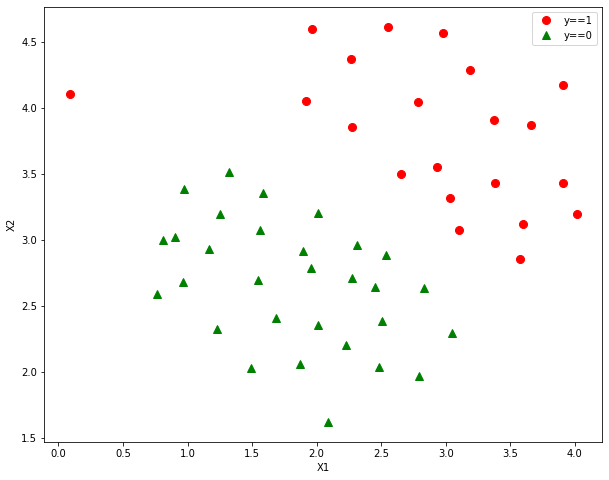

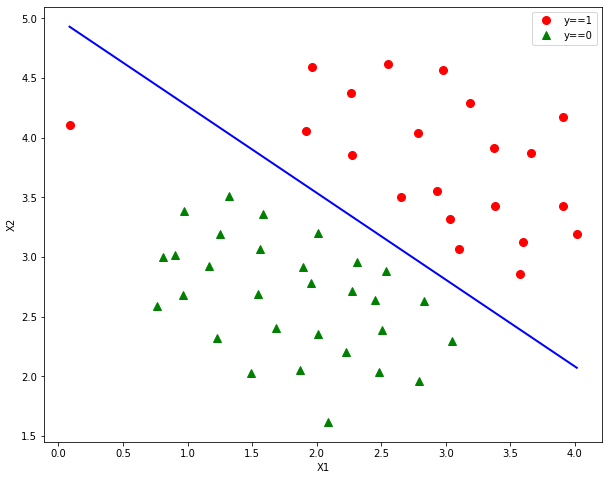

accuracy of linear SVM with C=10 is: 0.9090909090909091


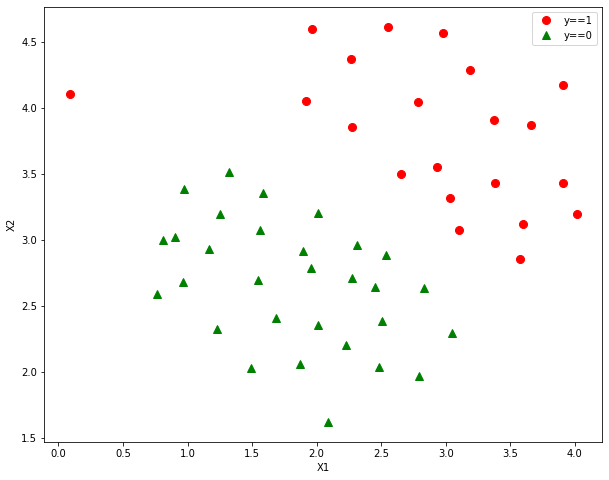

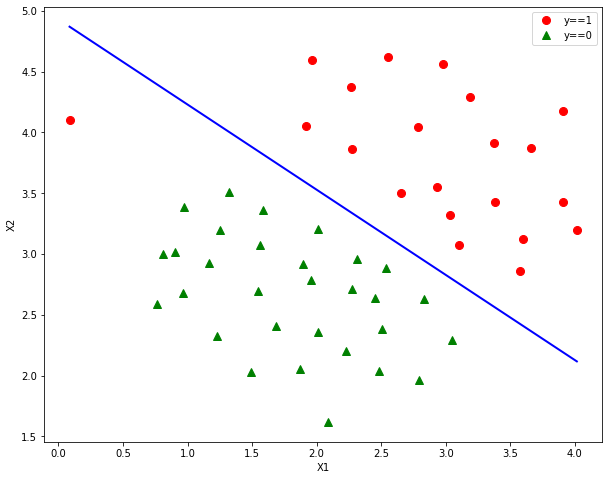

In [37]:
import numpy as np
from scipy import io as spio
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import metrics
 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import explained_variance_score
 
 
 
#Drawing
def plot_data(X, y):
  plt.figure(figsize=(10, 8))
  pos =  np.where (y == 1) # find the position of y = 1
  neg =  np.where (y == 0) # find the position where y = 0
  p1, = plt.plot(np.ravel(X[pos, 0]), np.ravel(X[pos, 1]), 'ro', markersize=8)
  p2, = plt.plot(np.ravel(X[neg, 0]), np.ravel(X[neg, 1]), 'g^', markersize=8)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.legend([p1, p2], ["y==1", "y==0"])
  return plt
 
 
#Drawing decision boundaries
def plot_decisionBoundary(X, y, model):
  plt = plot_data(X, y)
  w = model.coef_
  b = model.intercept_
  xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
  yp = -(w[0, 0] * xp + b) / w[0, 1]
  plt.plot(xp, yp, 'b-', linewidth=2.0)
  plt.show()
 
def SVM(C):
  # Data1 -- linear classification
  data1 = spio.loadmat('Dataset1.mat')
  X = data1['X']
  y = data1['y']
  y = np.ravel(y)
  plot_data(X, y)
 
  model =  svm.SVC(C = C, kernel = 'linear').fit(X[:int(len(X)*0.8)], y[:int(len(X)*0.8)])
  yp=model.predict(X[int(len(X)*0.8):])
  acc=metrics.accuracy_score(y[int(len(X)*0.8):],yp)
  print(f'accuracy of linear SVM with C={C} is: {acc}')
  plot_decisionBoundary(X, y, model) 
SVM(1)
SVM(10)

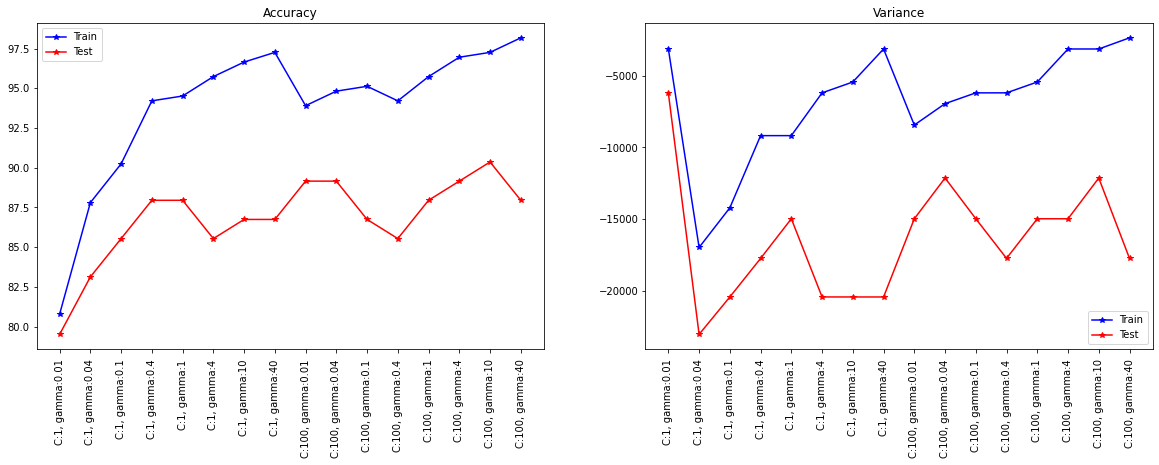

In [36]:
C = [1, 100]
gamma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]

data2 = spio.loadmat('Dataset2.mat')
X = data2['X']
y = data2['y']
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=24)
cv = RepeatedKFold(n_splits=5, n_repeats=5)

train_acc =[]
test_acc=[]
train_var=[]
test_var=[]
state=[]
for c in C:
    for g in gamma:
        param_grid = {'kernel': ['rbf'], 'C': [c], 'gamma': [g]}

        grid = GridSearchCV(svm.SVC(), param_grid, cv=cv, verbose=0)
        grid.fit(X_train, y_train)

        clf = grid.best_estimator_
        train_acc.append(clf.score(X_train, y_train) * 100)
        train_var.append(explained_variance_score(
            y_train, clf.predict(X_train)))

        test_acc.append(clf.score(X_test, y_test) * 100)
        test_var.append(explained_variance_score(
            y_test, clf.predict(X_test)))
        state.append(f"C:{c}, gamma:{g} ")

plt.figure(figsize=(20,6))
plt.subplot(121),plt.plot(state, train_acc,marker="*",c='b', label='Train'),plt.title("Accuracy"),plt.yticks(fontsize=10),plt.xticks(fontsize=10, rotation=90)
plt.subplot(121),plt.plot(state, test_acc,marker="*",c='r', label='Test'),plt.legend()
plt.subplot(122),plt.plot(state, train_var,marker="*",c='b', label='Train'),plt.title("Variance"),plt.yticks(fontsize=10),plt.xticks(fontsize=10, rotation=90)
plt.subplot(122),plt.plot(state, test_var,marker="*",c='r', label='Test'),plt.legend()

plt.show()
plt.close()